/tmp/ipykernel_19667/1512843518.py:144: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([y_label_formatter(x) for x in current_values])


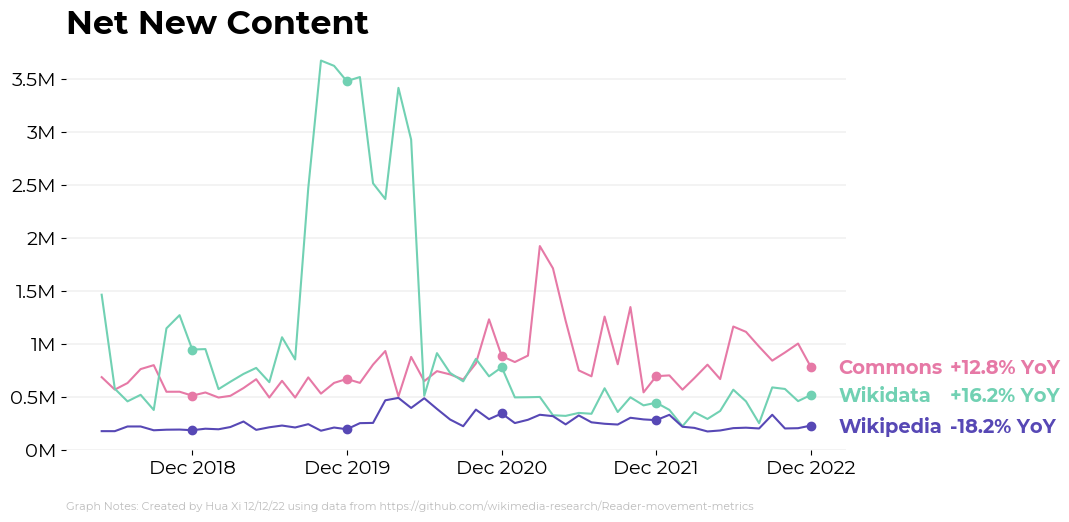

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib import font_manager
import os

#---PROMPT FOR INPUT---
outfile_name = "Net_New_Chart.png"

#---READ IN DATA--
#get current path
home_dir = os.getcwd()

df = pd.read_csv(home_dir + '/data/editor_metrics.tsv', sep='\t')

#display top rows for preview
#df.head()
#df.iloc[0,:]

#---CLEAN DATA--
#print out data types
#print(df.month.dtype)
#print(df.net_new_Commons_content_pages.dtype)
#print(df.net_new_Wikidata_entities.dtype)
#print(df.net_new_Wikipedia_articles.dtype)
#print(df.net_new_content_pages.dtype)

#convert string to datetime
df['month'] = pd.to_datetime(df['month'])

#truncate to preferred date range
df = df[df["month"].isin(pd.date_range("2018-05-01", "2022-12-01"))]

#---BREAK DATA INTO SUBSETS--
#create subsets of data for easier plotting
monthly_df = df[df['month'].dt.month == 12]
#subset to highlight the last two months
yoy_highlight = pd.concat([df.iloc[-13,:],df.iloc[-1,:]],axis=1).T
#subset to highlight specific months (manually entered)
#highlighted_months = df[df['month'].isin(['2021-10-01','2022-10-01'])]

#---PREPARE TO PLOT ---
#adjust plot size
plt.rcParams["figure.figsize"] = [12, 6]
#fig, ax = plt.subplots()
#plt.figure(figsize=(10, 6))

#create a dictionary for colors
wmf_colors = {'black75':'#404040','black50':'#7F7F7F','black25':'#BFBFBF','base80':'#eaecf0','base70':'#c8ccd1','red':'#970302','pink':'#E679A6','purple':'#5748B5','blue':'#0E65C0','brightblue':'#049DFF','brightbluelight':'#C0E6FF','yellow':'#F0BC00','green':'#308557','brightgreen':'#71D1B3'}

#add Montserrat file by file (quick fix)
#font_montserrat = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Regular.ttf")
#font_montserrat_bold = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Bold.ttf")

font_dirs = [home_dir + "/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#check added fonts
#result = custom_font_manager.get_font_names()
#print(result)

#add grid lines
#thin light black line
plt.grid(axis = 'y', color = wmf_colors['black25'], linewidth = 0.25)
#dashed light black line
#plt.grid(axis = 'y', color = wmf_colors['black25'], linestyle = '--', linewidth = 0.5)

#---PLOT---
#plot data
plt.plot(df.month, df.net_new_Commons_content_pages,
	label="Commons",
	color=wmf_colors['pink'],
	zorder=4)
plt.plot(df.month, df.net_new_Wikidata_entities,
	label="Wikidata",
	color=wmf_colors['brightgreen'],
	zorder=4)
plt.plot(df.month, df.net_new_Wikipedia_articles,
	label="Wikipedia",
	color=wmf_colors['purple'],
	zorder=4)

#draw circle on octobers by plotting scatter
plt.scatter(monthly_df.month, monthly_df.net_new_Commons_content_pages,
	label='_nolegend_',
	color=wmf_colors['pink'],
	zorder=5)
plt.scatter(monthly_df.month, monthly_df.net_new_Wikidata_entities,
	label='_nolegend_',
	color=wmf_colors['brightgreen'],
	zorder=5)
plt.scatter(monthly_df.month, monthly_df.net_new_Wikipedia_articles,
	label='_nolegend_',
	color=wmf_colors['purple'],
	zorder=5)

#draw circle on 2021 and 2022 to highlight for comparison
#scatter s variable sets size by "typographic points"
'''
highlight_radius = 1000000
plt.scatter(yoy_highlight.month, yoy_highlight.interactions_corrected,
	label='_nolegend_',
	s=(highlight_radius**0.5),
	facecolors='none',
	edgecolors=wmf_colors['yellow'],
	zorder=8)
#I explored using plt.patch.Circle but due to the unequal axes, it caused more trouble than this even though typographic points is not the ideal metric to be using
'''

#---FORMATTING---
#add title and labels
plt.title('Net New Content',font='Montserrat',weight='bold',fontsize=24,loc='left')
#plt.xlabel("Month",font='Montserrat', fontsize=18, labelpad=10) #source serif pro
#plt.ylabel("Active Editors",font='Montserrat', fontsize=14)

#add monthly x-axis labels
date_labels = []
for dl in monthly_df['month']:
	date_labels.append(datetime.datetime.strftime(dl, '%b %Y'))
#add major ticks
#plt.rcParams["xtick.major.size"] = 20
plt.xticks(ticks=monthly_df['month'],labels=date_labels,fontsize=14,minor=False)
#add minor ticks
#plt.rcParams["xtick.minor.size"] = 2
#plt.xticks(ticks=df['month'],minor=True)
plt.yticks(fontsize=14)

#print(plt.rcParams["xtick.major.size"])

#format axis labels
current_values = plt.gca().get_yticks()
#plt.set_major_formatter(FormatStrFormatter('%g'))
#f = lambda x,pos: str(x).rstrip('0').rstrip('.')
def y_label_formatter(value):
	formatted_value = '{:1.1f}M'.format(value*1e-6)
	formatted_value = formatted_value.replace('.0','')
	return formatted_value
plt.gca().set_yticklabels([y_label_formatter(x) for x in current_values])
plt.xticks(fontname = 'Montserrat')
plt.yticks(fontname = 'Montserrat')

#expand bottom margin
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.75)

#remove bounding box
for pos in ['right', 'top', 'bottom', 'left']:
	plt.gca().spines[pos].set_visible(False)

#---ADD ANNOTATIONS---
#add legend as data labels
def legend_annotate(data_label, legend_label, label_color):
	plt.annotate(legend_label,
		xy = (df['month'].iat[-1],df[data_label].iat[-1]),
		xytext = (20,-5),
		xycoords = 'data',
		textcoords = 'offset points',
		color=label_color,
		fontsize=14,
		weight='bold',
		family='Montserrat')
legend_annotate('net_new_Commons_content_pages', 'Commons',wmf_colors['pink'])
legend_annotate('net_new_Wikidata_entities', 'Wikidata',wmf_colors['brightgreen'])
legend_annotate('net_new_Wikipedia_articles', 'Wikipedia',wmf_colors['purple'])

#make YoY annotation
def yoy_annotation(data_label,label_color):
	yoy_change_percent = ((yoy_highlight[data_label].iat[-1] - yoy_highlight[data_label].iat[0]) /  yoy_highlight[data_label].iat[0]) * 100
	if yoy_change_percent > 0:
		yoy_annotation = f"+{yoy_change_percent:.1f}% YoY"
	else:
		yoy_annotation = f"{yoy_change_percent:.1f}% YoY"
	plt.annotate(yoy_annotation,
		xy = (yoy_highlight['month'].iat[-1],yoy_highlight[data_label].iat[-1]),
		xytext = (100,-5),
		xycoords = 'data',
		textcoords = 'offset points',
		color=label_color,
		family='Montserrat',
		fontsize=14,
		weight='bold',
		bbox=dict(pad=0, facecolor="white", edgecolor="none"))
yoy_annotation('net_new_Commons_content_pages',wmf_colors['pink'])
yoy_annotation('net_new_Wikidata_entities',wmf_colors['brightgreen'])
yoy_annotation('net_new_Wikipedia_articles',wmf_colors['purple'])

#data notes
plt.figtext(0.1, 0.1, "Graph Notes: Created by Hua Xi 12/12/22 using data from https://github.com/wikimedia-research/Reader-movement-metrics", fontsize=8, family='Montserrat', color= wmf_colors['black25'])

#---SHOW GRAPH---
#save as image
save_file_name = home_dir + "/charts/" + outfile_name
plt.savefig(save_file_name, dpi=300)
#show in window
plt.show()